##### 문제)

다음은 월수입과 보험 가입금액과의 관계를 알아보기 위해 조사에서 얻은 데이터의 일부이다. python을 이용하여 다음에 답하시오. 

(단위 : 월 수입-만원, 보험가입금액-천만원)


|||||||||||||||
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|월 수입 (만원)|	160	|55|	80|	60|	85|	77|	100|	63|	45|	50|72|60|150|
|보험가입금액 (천만원)|	20|	3.5|	3.5|	5|	10|	6.5|	3|	2.5|	1.5|	2|	2|	2.5|	15|
|||||||||||||||



##### 1.	
산점도를 그리고, 표본상관계수를 추정하고 상관관계가 존재하는지 유의수준 1% 하에서 검정하시오.


귀무 가설(H0): 월 수입과 보험 가입 금액 간의 상관 관계가 없다.

In [4]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

In [36]:
#monthly incomce ,insuared amount
mi = [160,55,80,60,85,77,100,63,45,50,72,60,150]
ia =[]
iab= [20,3.5,3.5,5,10,6.5,3,2.5,1.5,2,2,2.5,15]
for x in iab:
    ia.append(x*1000) 
# 1000 만원 단위 낮추기  

In [37]:
money = pd.DataFrame({'income':mi,'amount':ia})
money.head()

,income,amount
0,160,20000.0
1,55,3500.0
2,80,3500.0
3,60,5000.0
4,85,10000.0


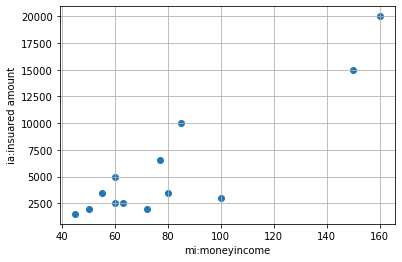

In [28]:
plt.scatter(mi,ia)
plt.xlabel('mi:moneyincome')
plt.ylabel('ia:insuared amount')
plt.grid()
plt.show()

In [29]:
# 피어슨 상관계수 분석 두번째 값이 P- value
import scipy.stats as stats
corr =stats.pearsonr(mi,ia)
corr

(0.9013934713000634, 2.5728289827309316e-05)

상관계수:0.901
P-value:0.0002~

결론 : 유의 수준 1%인 0.01 보다 유의 확률이 작다.

귀무 가설 기각한다.

강한 양의 상관관계를 갖는것을 알 수 있다.

In [26]:
#Pearson correlation
corr_m = money.corr(method='pearson')
print(corr_m)

          income    amount
income  1.000000  0.901393
amount  0.901393  1.000000


In [15]:
np.corrcoef(ia,mi)[0,1]

0.9013934713000639

Strong correlation in positive way 

##### 2.	

분산분석표를 작성하고 추정된 회귀직선이 유의한지 유의수준 5% 하에서 검정하시오

귀무 가설 : 회귀 추정식이 유의 하지 않으며, 추정된 자료에서 멀다.

In [34]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('ia~ mi',money).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
mi,1.0,3.188477e+08,3.188477e+08,47.669855,0.000026
Residual,11.0,7.357533e+07,6.688666e+06,NaN,NaN


유의확률(0.000026)이 유의수준 5%인 0.05 보다 작다

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mi   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     47.67
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.57e-05
Time:                        16:42:56   Log-Likelihood:                -53.657
No. Observations:                  13   AIC:                             111.3
Df Residuals:                      11   BIC:                             112.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.6292      6.653      7.159      0.000      32.985      62.273
ia             0.0057      0.001      6.904      0.000       0.004       0.007
==============================================================================
Omnibus:                        2.964   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                1.544
Skew:                           0.844   Prob(JB):                        0.462
Kurtosis:                       2.963   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
x=mi
y=ia
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m=m.round(4)
c=c.round(4)
print(m,c)

142.8973 -5695.5693


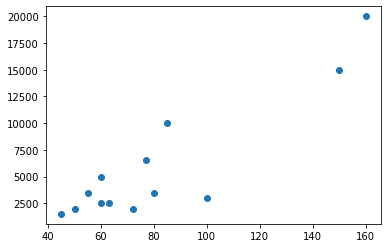

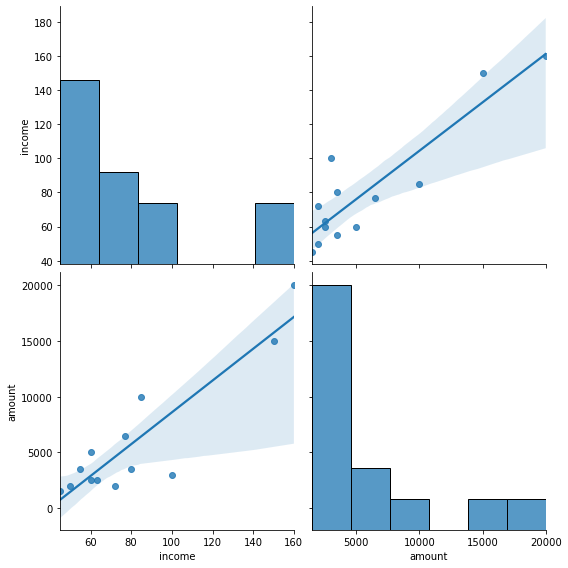

In [39]:
plt.scatter(money.income,money.amount)
sns.pairplot(money,kind='reg',height=4)


##### 5.
회귀모형에서 오차에 대한 가정을 쓰고, 자료가 회귀모형을 적용하기에 적절한지 설명하시오

가정)

오차= 잔차= 관측값-회귀식에서의 추정값

오차에 대한 가정으로 정규성 등분산성을 검정 한다.

In [62]:
#잔차의 정규성 검정
fitted = model.predict(money)
residual = money['amount'] - fitted #y = amoun SO OBSERVATION - PREDICT
residual

0     2832.008158
1     1336.220147
2    -2236.211279
3     2121.733861
4     3549.302436
5     1192.480492
6    -5594.156420
7     -806.957910
8      765.192717
9      550.706432
10   -2593.033223
11    -378.266139
12    -739.019272
dtype: float64

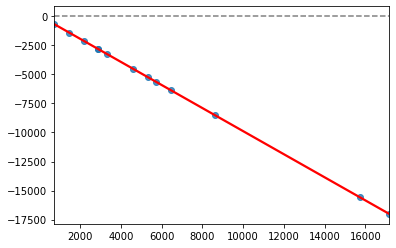

In [59]:
sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

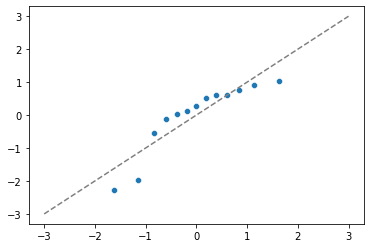

In [60]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

잔차의 정규성 검정, 샤피로 검정을 이용한다. 유의 수준은 5%로 검정한다.

귀무 가설: 잔차는 정규성을 따른다.


아래 분석에서 두 번째 값이 p값이다.

In [63]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9576632380485535, pvalue=0.7172977924346924)

유의 확률 p-value = 0.72 > 0.05 이므로 귀무 가설을 기각하지 않는다.

그렇므로 잔차의 등분산성과 정규성을 따른다는 가정할 수 있다.

<AxesSubplot:>

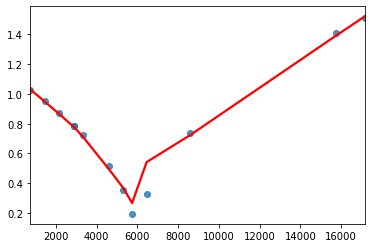

In [64]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

1번 그림(Q-Q plot)
잔차의 정규성을 만족 하는것을 보여준다

2번 그림좌측에 잔차가 선에따라모여 있는 것을 확인할 수있다. 

오차 즉 잔차가 정규성과 등분산 성을 만족 하는것으로 보이므로, 자료가 회귀 모형에 적절 하다고 할 수 있다.




##### 6
월 수입이 70만원일 때, 예상되는 보험가입금액을 구하시오. 

In [41]:

#월 수입 70 만원을 추정한 회귀식에 대입한다
x = 70
y= -5695.6 + 142.9*x
print(y)

4307.4
